In [2]:
import pandas as pd
import os
import pickle, gzip
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

color = sns.color_palette()
%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
path_to_dataset = './../data/mnist/'
dataset_name = 'mnist.pkl.gz'

# Открываем архив при помощи контекстного менеджера и читаем пикл файл
f = gzip.open(os.path.join(path_to_dataset, dataset_name), 'rb')
train_set, validation_set, test_set = pickle.load(f, encoding='latin1')
f.close()

# Раскладываем данные по выборкам
X_train, y_train = train_set[0], train_set[1]
X_validation, y_validation = validation_set[0], validation_set[1]
X_test, y_test = test_set[0], test_set[1]

# Смотрим на размеры датасетов
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_validation: ", X_validation.shape)
print("Shape of y_validation: ", y_validation.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (50000, 784)
Shape of y_train:  (50000,)
Shape of X_validation:  (10000, 784)
Shape of y_validation:  (10000,)
Shape of X_test:  (10000, 784)
Shape of y_test:  (10000,)


In [4]:
# Для начала не забываем про индексы:
train_index = range(0,len(X_train))
validation_index = range(len(X_train), len(X_train) + len(X_validation))
test_index = range(len(X_train)+len(X_validation), len(X_train) + len(X_validation)+len(X_test))

# Распределяем данные согласно индексам:
X_train = pd.DataFrame(data=X_train, index=train_index)
y_train = pd.Series(data=y_train, index=train_index)
X_validation = pd.DataFrame(data=X_validation, index=validation_index)
y_validation = pd.Series(data=y_validation ,index=validation_index)
X_test = pd.DataFrame(data=X_test, index=test_index)
y_test = pd.Series(data=y_test, index=test_index)

In [5]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label",
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)


# IsoMap

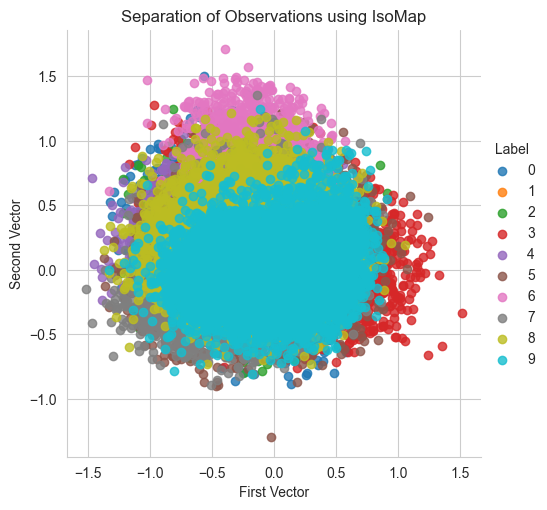

In [6]:
from sklearn.random_projection import SparseRandomProjection

n_components = 'auto'
density = 'auto' # количество ненулевых компонент в матрице проекций
eps = 0.5        # Гиперпараметр который отвечает за "качество" эмбеддингов.
                 # Меньшие значения приводят к лучшему эмбеддингу
                 # и большему количеству измерений (n_components) в целевом пространстве проекции.
dense_output = False # что выход случайной проекции в виде массива numpy
random_state = 42

SRP = SparseRandomProjection(n_components=n_components,
                             density=density,
                             eps=eps,
                             dense_output=dense_output,
                             random_state=random_state)

X_train_SRP = SRP.fit_transform(X_train)
X_train_SRP = pd.DataFrame(data=X_train_SRP, index=train_index)

X_validation_SRP = SRP.transform(X_validation)
X_validation_SRP = pd.DataFrame(data=X_validation_SRP, index=validation_index)

scatterPlot(X_train_SRP, y_train, "IsoMap")

# Multidimensional Scaling

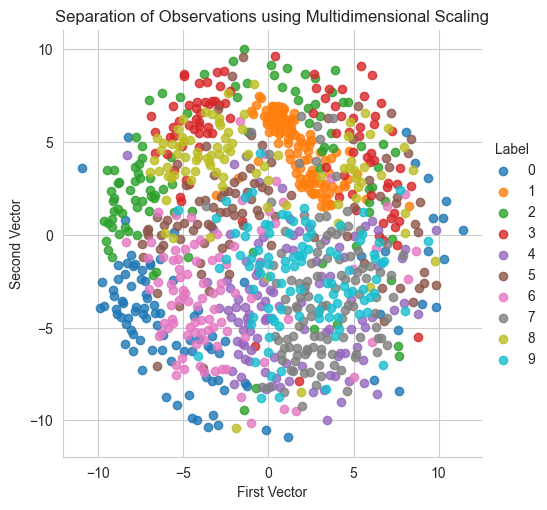

In [7]:
# Multidimensional Scaling
from sklearn.manifold import MDS

n_components = 2
n_init = 12
max_iter = 1200
metric = True
n_jobs = -1
random_state = 42

mds = MDS(n_components=n_components, n_init=n_init, max_iter=max_iter,
          metric=metric, n_jobs=n_jobs, random_state=random_state)

X_train_mds = mds.fit_transform(X_train.loc[0:1000,:])
X_train_mds = pd.DataFrame(data=X_train_mds, index=train_index[0:1001])

scatterPlot(X_train_mds, y_train, "Multidimensional Scaling")

# Locally Linear Embedding

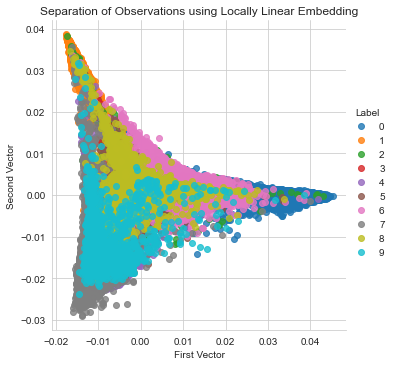

In [8]:
from sklearn.manifold import LocallyLinearEmbedding

n_neighbors = 10
n_components = 2
method = 'modified'
n_jobs = -1
random_state = 42


lle = LocallyLinearEmbedding(n_neighbors=n_neighbors,
                             n_components=n_components, method=method,
                             random_state=random_state, n_jobs=n_jobs)

lle.fit(X_train.loc[0:5000,:])

X_train_lle = lle.transform(X_train)
X_train_lle = pd.DataFrame(data=X_train_lle, index=train_index)

X_validation_lle = lle.transform(X_validation)
X_validation_lle = pd.DataFrame(data=X_validation_lle, index=validation_index)

scatterPlot(X_train_lle, y_train, "Locally Linear Embedding")

# Dictionary Learning

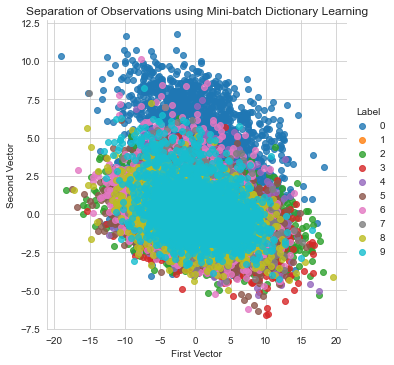

In [9]:
from sklearn.decomposition import MiniBatchDictionaryLearning

n_components = 50
alpha = 1
batch_size = 200
n_iter = 25
random_state = 42

miniBatchDictLearning = MiniBatchDictionaryLearning(n_components=n_components, alpha=alpha,
                                                    batch_size=batch_size, n_iter=n_iter,
                                                    random_state=random_state)


miniBatchDictLearning.fit(X_train.loc[:,:10000])

X_train_miniBatchDictLearning = miniBatchDictLearning.fit_transform(X_train)
X_train_miniBatchDictLearning = pd.DataFrame(data=X_train_miniBatchDictLearning, index=train_index)

X_validation_miniBatchDictLearning = miniBatchDictLearning.transform(X_validation)
X_validation_miniBatchDictLearning = pd.DataFrame(data=X_validation_miniBatchDictLearning, index=validation_index)

scatterPlot(X_train_miniBatchDictLearning, y_train, "Mini-batch Dictionary Learning")

# Independent Component Analysis

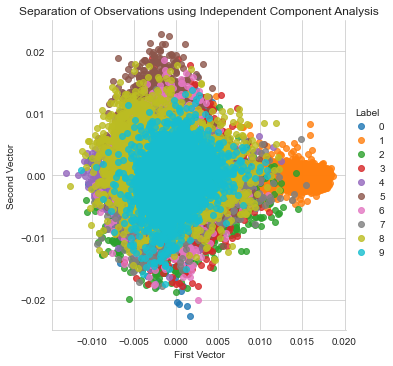

In [10]:
from sklearn.decomposition import FastICA

n_components = 25
algorithm = 'parallel'
whiten = True
max_iter = 100
random_state = 42

fastICA = FastICA(n_components=n_components, algorithm=algorithm,
                  whiten=whiten, max_iter=max_iter, random_state=random_state)

X_train_fastICA = fastICA.fit_transform(X_train)
X_train_fastICA = pd.DataFrame(data=X_train_fastICA, index=train_index)

X_validation_fastICA = fastICA.transform(X_validation)
X_validation_fastICA = pd.DataFrame(data=X_validation_fastICA, index=validation_index)

scatterPlot(X_train_fastICA, y_train, "Independent Component Analysis")